In [1]:
#!pip3 install --upgrade gym
#!pip3 install --upgrade box2d-py
#!pip3 install opencv-python
#from gym.envs.box2d.car_dynamics import Car

In [1]:
%matplotlib tk
import gym
from matplotlib import pyplot as plt
import cv2
import numpy as np
from car_env import CarRacing
import time
import cubic_spline_planner
import math
def rad_to_deg():
    pass
def accl_to_gas(accl,vel):
    dt=1.0
    SIZE = 0.02
    ENGINE_POWER= 100000000*SIZE*SIZE
    WHEEL_MOMENT_OF_INERTIA = 4000*SIZE*SIZE
    WHEEL_R  = 27 
    wheel_rad=WHEEL_R*SIZE
    mass=(2*WHEEL_MOMENT_OF_INERTIA)/wheel_rad
    #mass=.25
    power=4*mass*accl*(2*vel+accl*dt)/2
    gas=power/ENGINE_POWER
    return gas

def env_step(env,action,show_plot=False):
    
    frame=np.zeros((100,200,3),dtype=np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #action[0]=np.deg2rad(90)-action[0]
    #action[0]*=-1
    nst,rw,ter,info=envc.step(action) # take a random action
    frame[0:96,0:96,:]=np.array(nst)
    
    pos=envc.car.hull.position
    vel=np.sqrt(envc.car.hull.linearVelocity[0]**2+envc.car.hull.linearVelocity[1]**2)
    ang=envc.car.hull.angle
    vv=envc.car.hull.linearVelocity
    #if np.linalg.norm(vv) > 0.5:
    #        ang = math.atan2(vv[0], vv[1])
    #ang*=-1
    #ang+=np.deg2rad(90)#-ang
    if show_plot==True:
        plt.cla()
        img = cv2.putText(np.array(frame), 'vel %f'%vel, (100,10), font,.3, (255,255,0),1, cv2.LINE_AA)
        img = cv2.putText(np.array(img), 'ang %f'%ang, (100,20), font,.3, (255,0,255),1, cv2.LINE_AA)
        image = cv2.putText(np.array(img), 'x,y %f,%f'%(pos[0],pos[1]), (100,30), font,.2, (255,0,255),1, cv2.LINE_AA)
       
        plt.imshow(image)
        plt.show()
        plt.pause(0.0001)
        
    return [pos[0],pos[1],ang,vel],rw,ter,info
#envc.close()


envc=CarRacing()
def env_reset(envc):
    import pickle
    envc.reset()
    save=False
    if save==True:
        f=open('path-1','wb')
        pickle.dump(envc.track,f)
        f.close()
    f=open('path-1','rb')
    track=pickle.load(f)
    f.close()
    envc.track=track
    
    points=[[x,y] for a,b,x,y in envc.track]
    points=np.array(points)
    plt.plot(points[:,0],points[:,1])
    plt.show()
    return [env_step(envc,[0,0,0]),points]
envc=CarRacing()
st,points=env_reset(envc)

for i in range(1000):
    ang=np.deg2rad(30)
    st,rw,ter,info=env_step(envc,[-.5,.001,0])
    print(np.rad2deg(st[3]))
    print(st,'\n',np.rad2deg(st[2]),envc.car.wheels[0].joint.angle,envc.car.hull.angularVelocity)
    if np.rad2deg(st[2])>90:
        print(st,np.rad2deg(st[3]))
        envc.render()
        time.sleep(1)
        break
    envc.render()
    #time.sleep(0.1)
    #print(st)
    
envc.close()



Track generation: 1040..1304 -> 264-tiles track
1.3898036527476425
[218.42625427246094, -54.8576545715332, -0.11400365084409714, 0.024256649696690297] 
 -6.531928042449811 0.0600002184510231 -0.0017429586732760072
2.486207442992387
[218.4263458251953, -54.85679244995117, -0.11399390548467636, 0.04339250576780638] 
 -6.531369674485163 0.12000028043985367 0.0004904642119072378
3.621085455031718
[218.42648315429688, -54.85553741455078, -0.1139969527721405, 0.06319986368638054] 
 -6.531544271195821 0.18000014126300812 -0.00015927082858979702
4.730123964266105
[218.4266357421875, -54.8538932800293, -0.11397994309663773, 0.08255623720393014] 
 -6.530569688578625 0.2400001585483551 0.0008520029950886965
5.816700123239438
[218.4268035888672, -54.85186767578125, -0.11394534260034561, 0.10152056875168813] 
 -6.528587226172029 0.30000025033950806 0.0017348745604977012
6.876775582860165
[218.4269561767578, -54.84947204589844, -0.11387868225574493, 0.120022375841662] 
 -6.5247678697655225 0.3600001

48.33867483362247
[218.3824462890625, -54.3768310546875, -0.06502246856689453, 0.8436690318976343] 
 -3.725513022405115 0.4199996888637543 0.09655681997537613
49.12250639268882
[218.38011169433594, -54.35981369018555, -0.06305503845214844, 0.8573494733843825] 
 -3.6127875803432246 0.4199995696544647 0.09836628288030624
49.9030537944671
[218.377685546875, -54.342529296875, -0.06105160713195801, 0.8709725955133004] 
 -3.4979994211519903 0.41999951004981995 0.10016810148954391
50.68038291369808
[218.37518310546875, -54.32498550415039, -0.059012215584516525, 0.8845395480155087] 
 -3.381150892708939 0.419999361038208 0.10196225345134735
51.45451549924573
[218.3726043701172, -54.30717468261719, -0.05693714693188667, 0.8980507104802918] 
 -3.2622582167133505 0.41999930143356323 0.1037488654255867
52.22548430039373
[218.3699188232422, -54.28910827636719, -0.05482659488916397, 0.9115066544904779] 
 -3.141332492222625 0.41999930143356323 0.10552800446748734
52.993322510443825
[218.36717224121094

85.4022996194633
[218.11964416503906, -53.173179626464844, 0.08207441866397858, 1.490551317134335] 
 4.702517795435726 0.41999995708465576 0.18195445835590363
86.0520003666486
[218.1109161376953, -53.14437484741211, 0.08574341982603073, 1.5018907343253858] 
 4.9127360770499084 0.419999897480011 0.18344871699810028
86.6996587601148
[218.10202026367188, -53.11538314819336, 0.0894421711564064, 1.5131945057195477] 
 5.124658917748833 0.4199999272823334 0.1849382370710373
87.34529413167523
[218.0929412841797, -53.08620834350586, 0.09317062795162201, 1.5244629687206144] 
 5.33828375621156 0.419999897480011 0.18642301857471466
87.988935706331
[218.0836944580078, -53.05685806274414, 0.09692870080471039, 1.5356966334010784] 
 5.553605469796212 0.419999897480011 0.18790310621261597
88.63058465684423
[218.07424926757812, -53.02732849121094, 0.10071615129709244, 1.5468955202295005] 
 5.7706103981244485 0.4200000464916229 0.1893785148859024
89.27025009636633
[218.06463623046875, -52.99761962890625,

116.78306970947858
[217.38754272460938, -51.47722244262695, 0.31044864654541016, 2.038249077016459] 
 17.787397202600648 0.4200005531311035 0.25404366850852966
117.34379453741008
[217.366943359375, -51.441715240478516, 0.31555524468421936, 2.048035571461542] 
 18.079983723623776 0.4200005829334259 0.25533029437065125
117.90307698444956
[217.3460693359375, -51.40614700317383, 0.3206874132156372, 2.057796891610992] 
 18.37403532022387 0.42000067234039307 0.25661376118659973
118.46095718204633
[217.32492065429688, -51.370513916015625, 0.32584530115127563, 2.067533737890732] 
 18.6695605301374 0.42000067234039307 0.2578936815261841
119.01740041228419
[217.303466796875, -51.33483123779297, 0.33102869987487793, 2.0772455043588156] 
 18.966547400533308 0.42000067234039307 0.2591705322265625
119.5724429942762
[217.28173828125, -51.29909133911133, 0.3362376391887665, 2.086932824903347] 
 19.264997638958892 0.4200005829334259 0.26044389605522156
120.12608566845847
[217.25973510742188, -51.263298

144.20283426850577
[215.90847778320312, -49.61931610107422, 0.6086558699607849, 2.516814248693134] 
 34.87341252461644 0.4200010895729065 0.3169136643409729
144.69845543049703
[215.8712921142578, -49.58497619628906, 0.6150169968605042, 2.525464469812442] 
 35.23787824891749 0.42000097036361694 0.3180491626262665
145.19297642639796
[215.83375549316406, -49.550758361816406, 0.6214005947113037, 2.534095489411155] 
 35.603631463877086 0.4200010299682617 0.31918206810951233
145.68643773620812
[215.79586791992188, -49.516666412353516, 0.6278068423271179, 2.5427080139985456] 
 35.970682414778985 0.4200010895729065 0.3203125596046448
146.17876579384057
[215.7576446533203, -49.482704162597656, 0.634235680103302, 2.5513007596041803] 
 36.3390276865286 0.4200010895729065 0.32144051790237427
146.6700745898331
[215.7190704345703, -49.44887924194336, 0.640687108039856, 2.5598757157382592] 
 36.70866727912594 0.4200010299682617 0.32256612181663513
147.16029378875857
[215.68014526367188, -49.415187835

169.52234576211518
[213.40736389160156, -48.046295166015625, 0.9833993911743164, 2.9587230892531657] 
 56.34463469002303 0.4200007915496826 0.37489017844200134
169.96557093277556
[213.35191345214844, -48.02479553222656, 0.9909175038337708, 2.9664588278089035] 
 56.775390815313635 0.42000073194503784 0.37590450048446655
170.407915849276
[213.29617309570312, -48.00365447998047, 0.9984557032585144, 2.9741792030312957] 
 57.207297827479394 0.4200008511543274 0.3769167363643646
170.84942888182786
[213.24012756347656, -47.982887268066406, 1.0060142278671265, 2.98188505913979] 
 57.640369386898634 0.42000091075897217 0.37792715430259705
171.29006407001665
[213.18377685546875, -47.96249008178711, 1.0135929584503174, 2.9895755939738295] 
 58.0745986633822 0.42000091075897217 0.3789357841014862
171.72986583550474
[213.1271514892578, -47.94247055053711, 1.0211918354034424, 2.9972515828376807] 
 58.50998224183549 0.42000091075897217 0.37994202971458435
172.16879791310987
[213.07020568847656, -47.9

191.49611319252938
[210.18505859375, -47.50838851928711, 1.4003506898880005, 3.3422376799813875] 
 80.23418436881559 0.42000138759613037 0.4251585602760315
191.89855883216293
[210.1179962158203, -47.511573791503906, 1.4088722467422485, 3.349261681453288] 
 80.72243361144479 0.42000138759613037 0.4260786771774292
192.30025291363626
[210.0508270263672, -47.51533889770508, 1.4174121618270874, 3.3562725657607717] 
 81.21173470320616 0.42000138759613037 0.4269973635673523
192.70128631867968
[209.98355102539062, -47.519683837890625, 1.425970435142517, 3.363271919089263] 
 81.70208764409972 0.42000138759613037 0.4279143512248993
193.10158539303617
[209.91616821289062, -47.52461242675781, 1.4345470666885376, 3.37025845592947] 
 82.19349243412546 0.42000138759613037 0.4288296699523926
193.50119893936196
[209.8487091064453, -47.53013610839844, 1.4431419372558594, 3.3772330280484253] 
 82.6859422430942 0.42000138759613037 0.4297434687614441
193.90011866738388
[209.78115844726562, -47.536251068115

In [1]:
#env=gym.make('CarRacing-v0')
#env.action_space
#env.action_space.sample()

In [4]:
import Car
envc=CarRacing()
envc.reset()
nst,rw,ter,info=envc.step([0,1,0])

NameError: name 'CarRacing' is not defined

In [4]:
def accl_to_gas(accl,vel):
    SIZE = 0.02
    ENGINE_POWER= 100000000*SIZE*SIZE
    WHEEL_MOMENT_OF_INERTIA = 4000*SIZE*SIZE
    WHEEL_R  = 27 
    wheel_rad=WHEEL_R*SIZE
    mass=(2*WHEEL_MOMENT_OF_INERTIA)/wheel_rad
    mass=4*mass
    #mass=.25
    power=mass*accl*(vel+accl/2)
    gas=power/ENGINE_POWER
    return gas


In [5]:
gas=accl_to_gas(1,0)
SIZE = 0.02
ENGINE_POWER= 100000000*SIZE*SIZE
gas*ENGINE_POWER

11.851851851851851

In [19]:
def accl_to_gas(accl,vel):
    SIZE = 0.02
    ENGINE_POWER= 100000000*SIZE*SIZE
    WHEEL_MOMENT_OF_INERTIA = 4000*SIZE*SIZE
    WHEEL_R  = 27 
    wheel_rad=WHEEL_R*SIZE
    mass=(2*WHEEL_MOMENT_OF_INERTIA)/wheel_rad
    #mass=.25
    power=4*mass*accl*vel
    gas=power/ENGINE_POWER
    return gas

def env_step(env,action):
    plt.cla()
    frame=np.zeros((100,200,3),dtype=np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    nst,rw,ter,info=envc.step(action) # take a random action
    frame[0:96,0:96,:]=np.array(nst)
    
    pos=envc.car.hull.position
    vel=np.sqrt(envc.car.hull.linearVelocity[0]**2+envc.car.hull.linearVelocity[1]**2)
    ang=envc.car.hull.angle
    
    img = cv2.putText(np.array(frame), 'vel %f'%vel, (100,10), font,.3, (255,255,0),1, cv2.LINE_AA)
    img = cv2.putText(np.array(img), 'ang %f'%ang, (100,20), font,.3, (255,0,255),1, cv2.LINE_AA)
    image = cv2.putText(np.array(img), 'x,y %f,%f'%(pos[0],pos[1]), (100,30), font,.2, (255,0,255),1, cv2.LINE_AA)
        
    plt.imshow(image)
    plt.show()
    plt.pause(0.0001)
        
    return [pos[0],pos[1],vel,ang],rw,ter,info
#envc.close()

In [41]:
envc.close()

In [5]:
%matplotlib tk
import gym
from matplotlib import pyplot as plt
import cv2
import numpy as np
from car_env import CarRacing
import time

envc=CarRacing()
def env_reset(envc):
    import pickle
    envc.reset()
    save=False
    if save==True:
        f=open('path-1','wb')
        pickle.dump(envc.track,f)
        f.close()
    f=open('path-1','rb')
    track=pickle.load(f)
    f.close()
    envc.track=track
    
    points=[[x,y] for a,b,x,y in envc.track]
    points=np.array(points)
    plt.plot(points[:,0],points[:,1])
    plt.show()
    return env_step(envc,[0,0,0])
    

for i in range(100):
    st,rw,ter,info=env_step(envc,[0,1,0])
    time.sleep(0.1)
    #print(st)
envc.close()

Track generation: 1041..1305 -> 264-tiles track


In [16]:
plt.plot(points[:,0]+150,points[:,1]+150)
plt.show()

In [ ]:
cv2.imwrite(data)

In [8]:
#https://navoshta.com/detecting-road-features/
#https://towardsdatascience.com/tutorial-build-a-lane-detector-679fd8953132
#https://towardsdatascience.com/finding-lane-lines-simple-pipeline-for-lane-detection-d02b62e7572b

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class image_to_traj():
    def __init__(self,N=10):
        self.N=N
    #@property
    def run(self,image):
        canny = self.do_canny(image)
        segment = self.do_segment(canny)
        ret= self.get_points(segment)
        return ret
        #hough = cv2.HoughLinesP(segment, 1, np.pi / 180, 10, np.array([]), minLineLength = 5, maxLineGap = 5)
    def do_canny(self,image):
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        canny = cv2.Canny(blur, 50, 150)
        return canny

    def do_segment(self,img):
        height = img.shape[0]
        polygons = np.array([
                                [(0, 80), (96, 80), (0, 0),(96,0)]
                            ])
        mask = np.zeros_like(img)
        cv2.fillPoly(mask, polygons, 255)
        segment = cv2.bitwise_and(img, mask)
        return segment

    def get_points(self,segment):
        crops=[]
        cxs=[]
        _cys=[]
        cys=[]
        offset=self.N//2
        height=segment.shape[1]
        for i in range(height//self.N):
            crop=segment[i*self.N:(i+1)*self.N,:]
            crops.append(crop)
            M=cv2.moments(crop)
            try:
                cx = int(M['m10']/M['m00'])
                cy = int(M['m01']/M['m00'])
            except:
                pass
                #cx=20
                #cy=N
            cxs.append(cx)
            _cys.append(cy)
            cys.append(offset+cy)
            #print(cx,cy)
            #print(crop)
            _crop=crop.copy()
            img = cv2.circle(_crop,(cx,cy), 2, (255,255,255), -1)
            #plt.imshow(img,cmap='gray',vmin=0,vmax=255)
            #plt.show()_
            offset+=self.N
            #print(i)
        return crops,cxs,_cys,cys

x,y : 21 5 x,y : 32 14 x,y : 43 23 x,y : 47 33 x,y : 47 46 x,y : 47 54 x,y : 47 64 x,y : 47 74 x,y : 47 80 

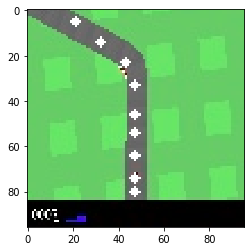

In [3]:
i=0
N=10
frame=cv2.imread('car_lane.jpg')
i2t=image_to_traj(N=10)
[crops,cxs,cys,hh]=i2t.run(frame)
#crops,cxs,cys=get_points(segment,N)
for x,y,crop in zip(cxs,cys,crops):
    img = cv2.circle(frame,(x,i+y), 2, (255,255,255), -1)
    print('x,y :',x,y+i,end=' ')
    i+=N
    
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

In [71]:
# Draw the lines
if hough is not None:
        for i in range(0, len(hough)):
            l = hough[i][0]
            _ss=cv2.line(canny, (l[0], l[1]), (l[2], l[3]), (255,255,255), 1, cv.LINE_AA)

In [72]:
plt.imshow(nst)

In [73]:
#cv2.imwrite(nst,'car_lane.jpg')

TypeError: bad argument type for built-in operation

In [49]:
#len(hough)
_ss.shape

(96, 96)